In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
font_path = "../resData/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [7]:
# 서울에서 전출한 데이터 추출
df = pd.read_excel('../resData/시도별_전출입_인구수.xlsx', engine='openpyxl', header=0)
df = df.ffill()
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1) # axis=1 : 열
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)
print('df_seoul 테이블\n', df_seoul)

df_seoul 테이블
             1970     1971     1972     1973     1974     1975     1976  \
전입지                                                                      
전국       1448985  1419016  1210559  1647268  1819660  2937093  2495620   
부산광역시      11568    11130    11768    16307    22220    27515    23732   
대구광역시          -        -        -        -        -        -        -   
인천광역시          -        -        -        -        -        -        -   
광주광역시          -        -        -        -        -        -        -   
대전광역시          -        -        -        -        -        -        -   
울산광역시          -        -        -        -        -        -        -   
세종특별자치시        -        -        -        -        -        -        -   
경기도       130149   150313    93333   143234   149045   253705   202276   
강원도         9352    12885    13561    16481    15479    27837    25927   
충청북도        6700     9457    10853    12617    11786    21073    18029   
충청남도       15954    1894

In [8]:
# 연도를 2010~2017까지로 설정
col_years = list(map(str, range(2010,2018))) # 열 지정
col_years

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [13]:
# 연도를 적용하여 각 4개의 도를 추출
df4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
print(df4)
df4['합계'] = df4.sum(axis=1)

       2010   2011   2012   2013   2014   2015   2016   2017
전입지                                                         
충청남도  24522  24723  22269  21486  21473  22299  21741  21020
경상북도  16042  15818  15191  14420  14456  15113  14236  12464
강원도   22736  23624  22332  20601  21173  22659  21590  21016
전라남도  16429  15974  14765  14187  14591  14598  13065  12426


In [14]:
'''
새롭게 생성한 '합계' 열을 오름차순으로 정렬하여 변수에 저장 '''
df_total = df4[['합계']].sort_values(by='합계', ascending=True)
print(df_total)

          합계
전입지         
전라남도  116035
경상북도  117740
강원도   175731
충청남도  179533


<Axes: ylabel='전입지'>

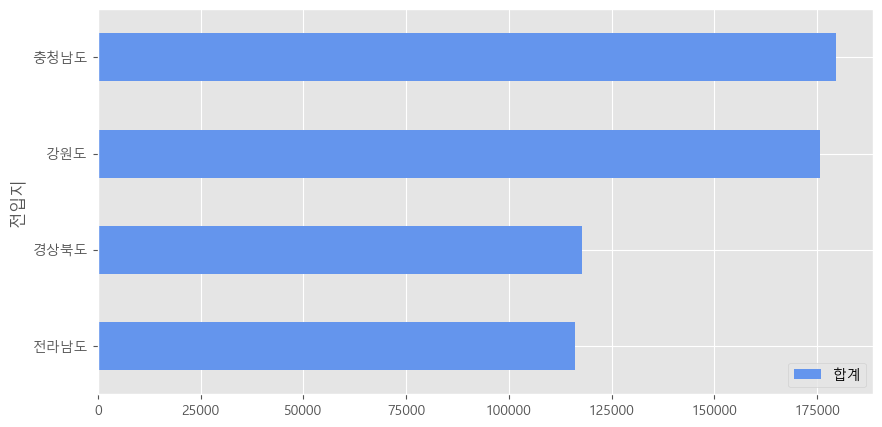

In [15]:
plt.style.use('ggplot')
# 수평 형태의 막대그래프(kind='barh')생성
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

Text(0.5, 0, '이동 인구 수')

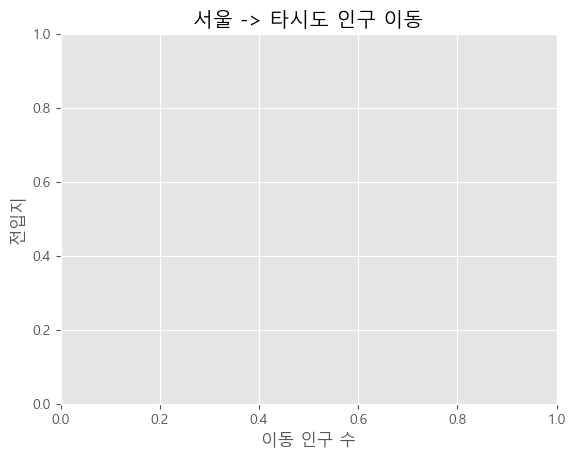

In [16]:
plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

In [19]:
plt.show()